# K Nearest Neighbors Project

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Get the Data

In [7]:
df = pd.read_csv('./filez/KNN_Project_Data.csv')
df.head(3)

XVPM        GWYH         TRAT        TLLZ         IGGA         HYKR  \
0  1636.670614  817.988525  2565.995189  358.347163   550.417491  1618.870897   
1  1013.402760  577.587332  2644.141273  280.428203  1161.873391  2084.107872   
2  1300.035501  820.518697  2025.854469  525.562292   922.206261  2552.355407   

          EDFS        GUUB         MGJM         JHZC  TARGET CLASS  
0  2147.641254  330.727893  1494.878631   845.136088             0  
1   853.404981  447.157619  1193.032521   861.081809             1  
2   818.676686  845.491492  1968.367513  1647.186291             1

## Exploratory Data Analysis

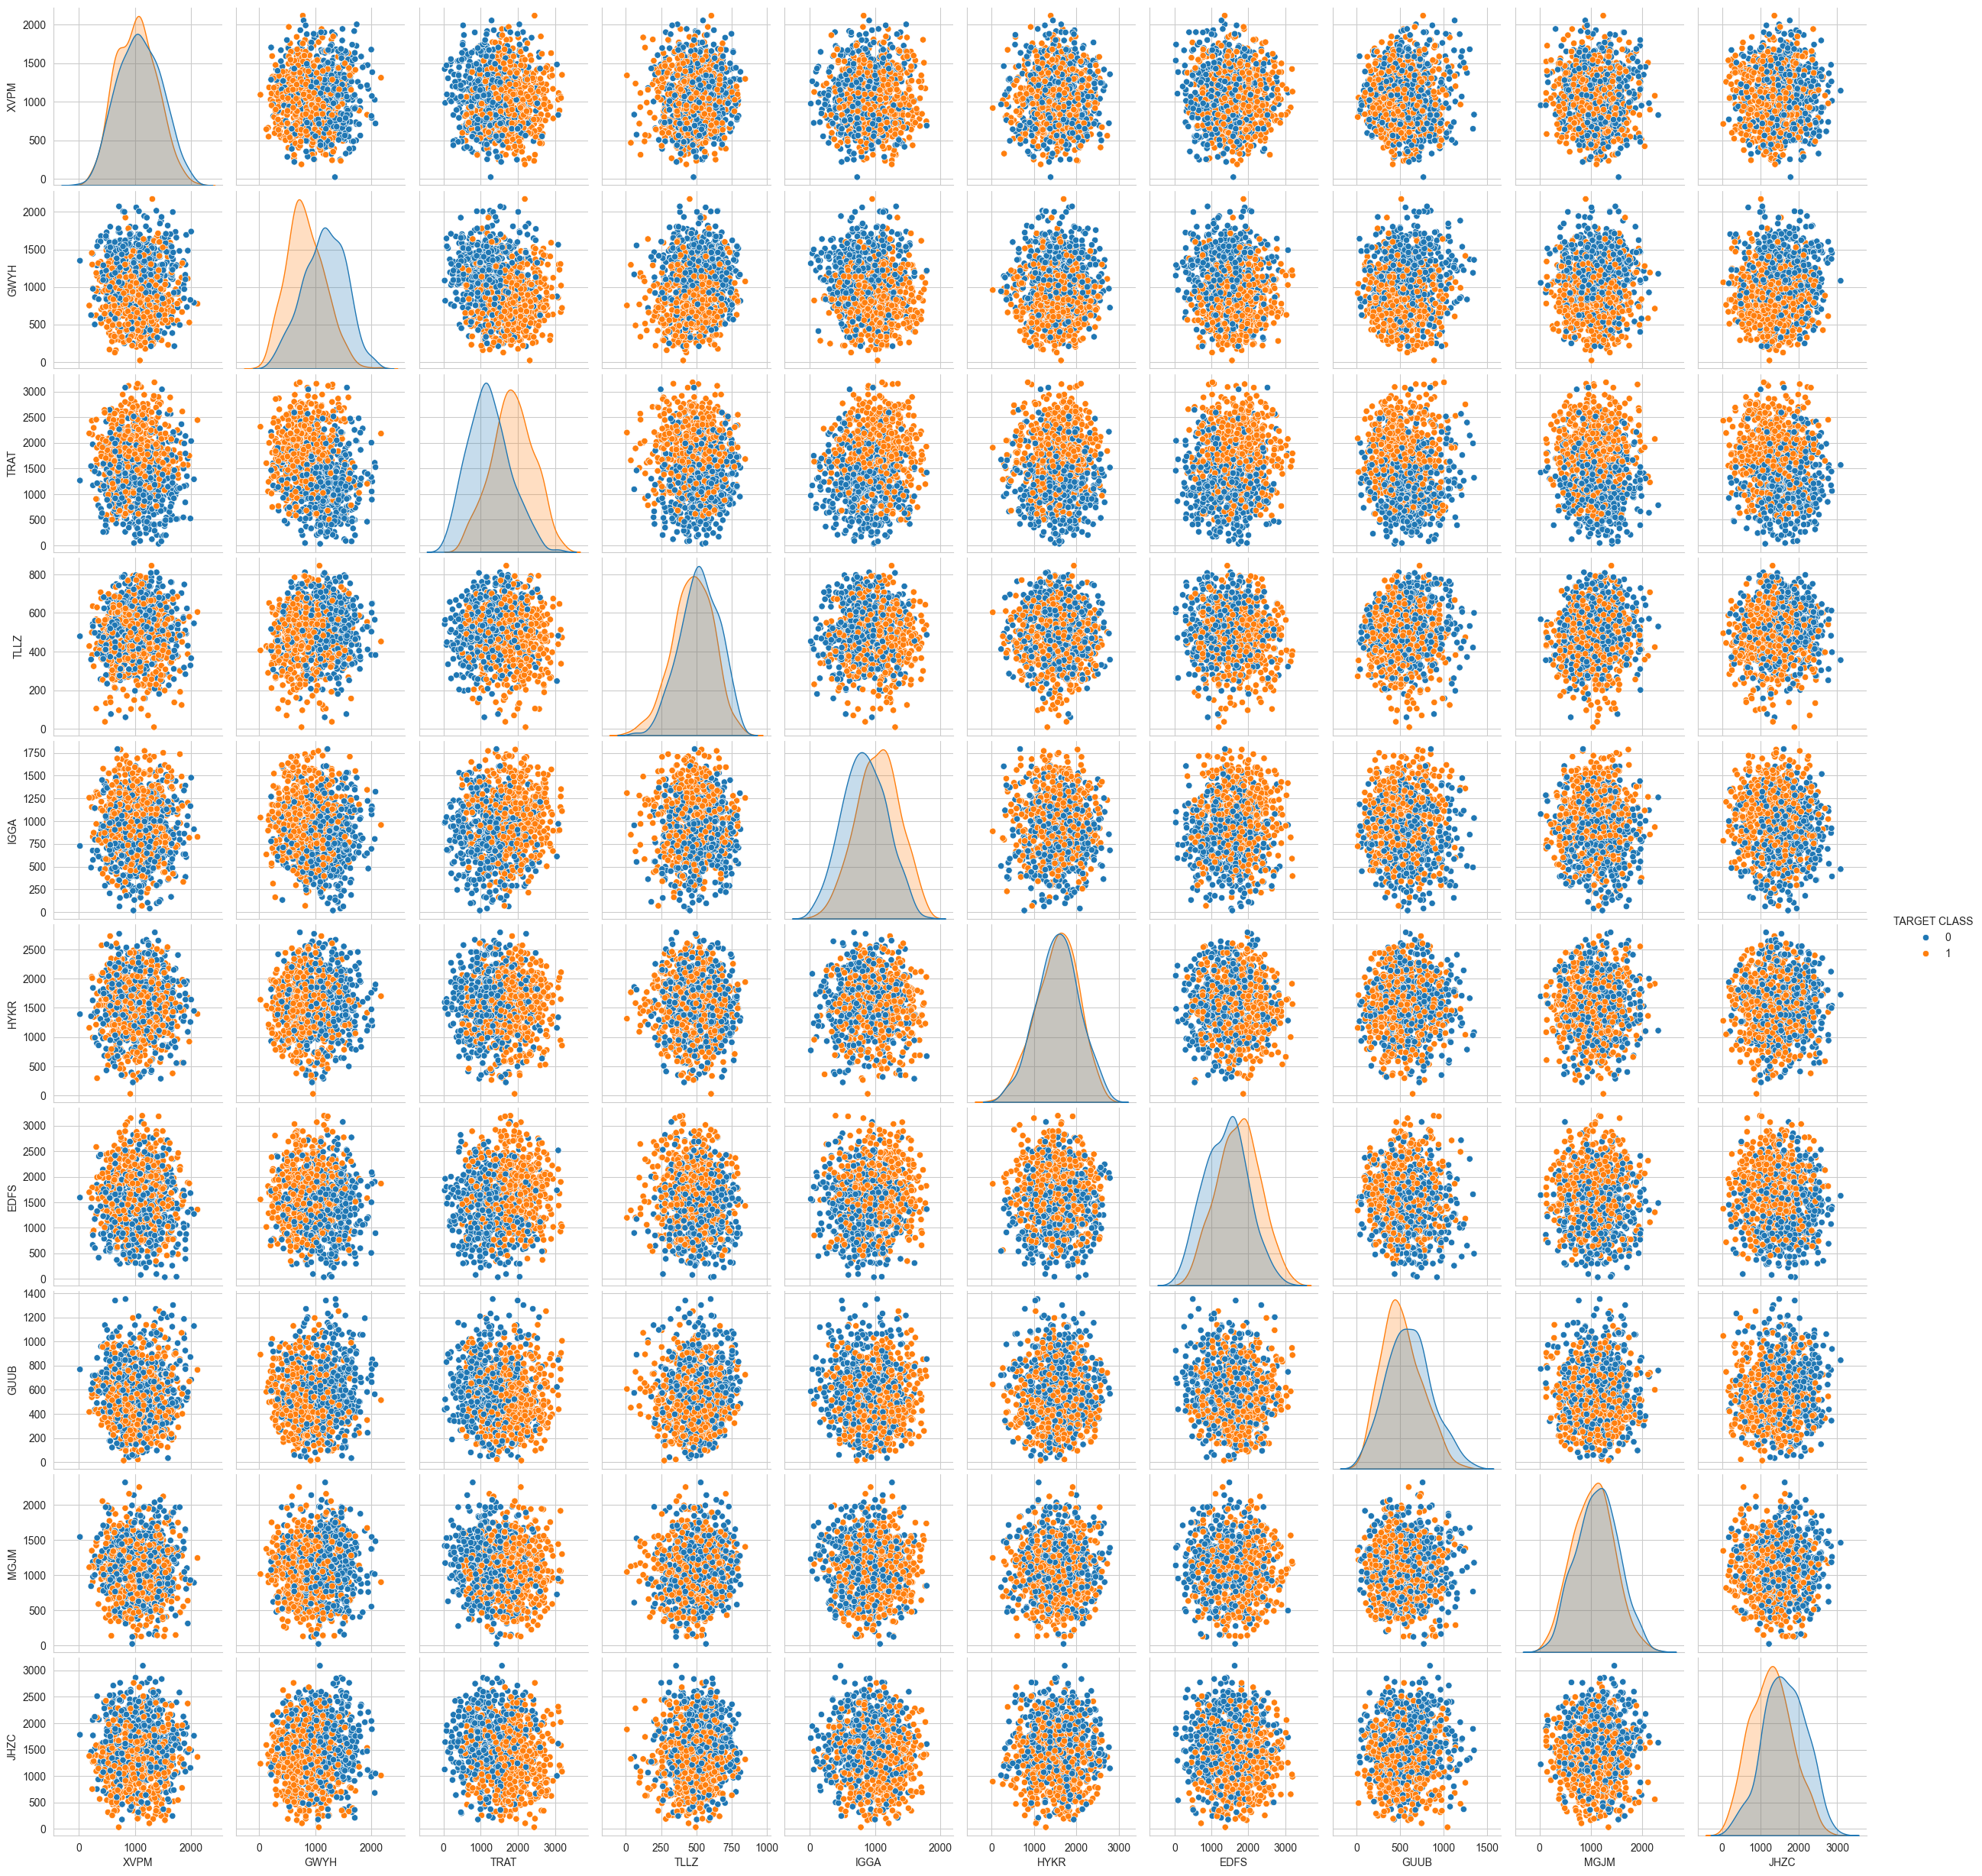

In [8]:
# show pairplot with hue as TARGET CLASS
sns.pairplot(data=df, hue='TARGET CLASS')
# Now we would do jointplot/etc with any combination that shows clear patterns,
# but we ignore it as we don0t know what the features are

## Standardize the Variables

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [11]:
# recreate features
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head(3)

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df["TARGET CLASS"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

## Using KNN

In [33]:
# fit the model
from sklearn.neighbors import KNeighborsClassifier

def fit_model(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    return knn.fit(X_train, y_train)

knn = fit_model(1)

## Predictions and Evaluations

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

pred = knn.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

[[109  43]
 [ 41 107]]


## Choosing a K-value

Text(0, 0.5, 'Error Rate')

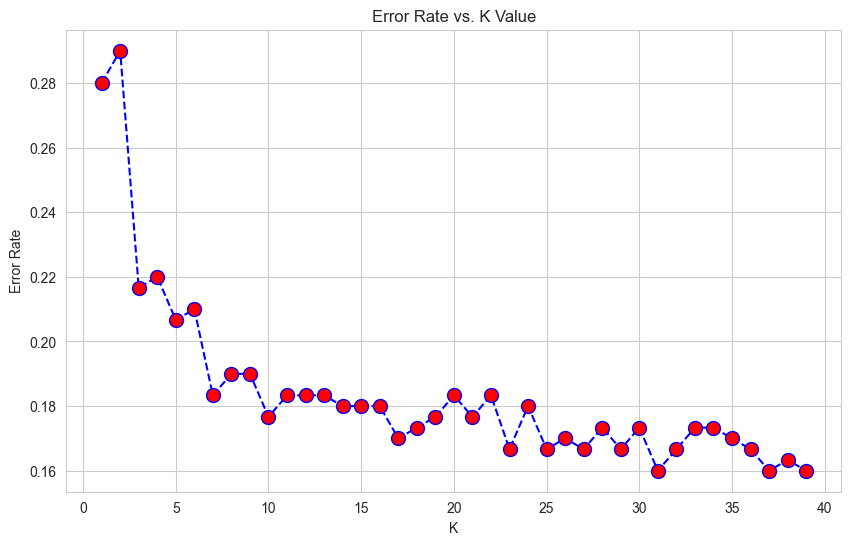

In [35]:
# Find a good k-value
error_rate = []

for i in range(1,40):
    knn = fit_model(i)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 40),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# with K=30
knn = fit_model(30)
pred = knn.predict(X_test)
print(f'{classification_report(y_test, pred)}\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300


[[124  28]
 [ 24 124]]
